In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dataclusterlabs/vehicle-image-captioning-dataset")

print("Path to dataset files:", path)


100%|██████████| 166M/166M [00:02<00:00, 61.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dataclusterlabs/vehicle-image-captioning-dataset/versions/1


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/dataclusterlabs/vehicle-image-captioning-dataset/versions/1'

In [ ]:
import os
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

# Set the path to the dataset in Google Drive
image_dir = '/content/drive/MyDrive/vehicle-image-captioning-dataset/indian_vehicle_images/indian_vehicle_images'  # Adjust as necessary
captions = {}


In [ ]:
# Load model and processor
processor = BlipProcessor.from_pretrained('Salesforce/blip-image-captioning-base')
model = BlipForConditionalGeneration.from_pretrained('Salesforce/blip-image-captioning-base')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [ ]:
# Loop through images and generate captions
for image_name in os.listdir(image_dir):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_dir, image_name)
        image = Image.open(image_path)

        # Prepare the image
        inputs = processor(images=image, return_tensors='pt')

        # Generate caption
        out = model.generate(**inputs)
        caption = processor.decode(out[0], skip_special_tokens=True)

        captions[image_name] = caption


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
# Display captions
for img, cap in captions.items():
    print(f'{img}: {cap}')


dc_vehicle_captions_000028_CRBaJDhw.jpg: a green and yellow bus parked on the side of a road
dc_vehicle_captions_000015_PYYcf1Cc.jpg: a man riding an elephant down a street
dc_vehicle_captions_000008_iGVx5U5k.jpg: a blue bus is parked on the side of the road
dc_vehicle_captions_000012_MOl9k1cz.jpg: a bus is parked on the side of the road
dc_vehicle_captions_000040_nup4PwVq.jpg: a white bus parked in a lot
dc_vehicle_captions_000033_c7vDYCN6.jpg: a sign on a tree in a street
dc_vehicle_captions_000011_wHhdVc3Z.jpg: a lot of buses
dc_vehicle_captions_000039_OqtajU84.jpg: a bus is parked on the side of the road
dc_vehicle_captions_000036_hCuPJAUp.jpg: a white car parked on a brick road
dc_vehicle_captions_000016_o2sENGmR.jpg: a man is standing next to a parked motorcycle
dc_vehicle_captions_000023_XYRdcT3l.jpg: a green bus parked in a parking
dc_vehicle_captions_000009_kBMVGjo7.jpg: a black car parked on the side of the road
dc_vehicle_captions_000044_5OXmnXqS.jpg: a man riding a motorcyc

In [ ]:
# Save captions to a text file in Google Drive
with open('/content/drive/MyDrive/captions.txt', 'w') as f:
    for img, cap in captions.items():
        f.write(f'{img}: {cap}\n')

print('Captions saved to /content/drive/MyDrive/captions.txt')


Captions saved to /content/drive/MyDrive/captions.txt


dc_vehicle_captions_000028_CRBaJDhw.jpg


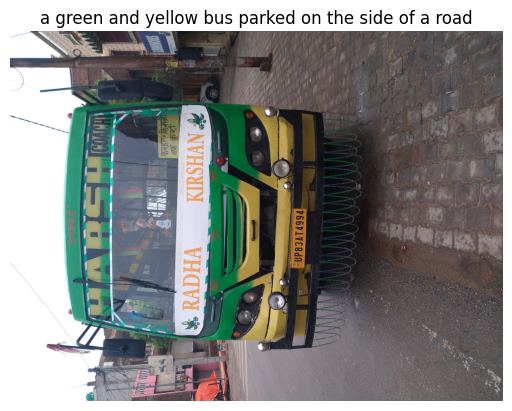

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load the captions CSV file
#captions_df = pd.read_csv('/content/drive/My Drive/vehicle-image-captioning-dataset/captions.csv')

# Function to display image and caption
def display_image_caption():
  """Displays an image and its corresponding caption.

  Args:
    image_id: The ID of the image to display.
  """
  image_path = '/content/drive/MyDrive/vehicle-image-captioning-dataset/indian_vehicle_images/indian_vehicle_images'
  images = os.listdir(image_path)
  image_id = images[0]
  print(image_id)
  caption = captions[image_id]

  img_path=os.path.join(image_path, image_id)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')  # Turn off axis numbers and ticks
  plt.title(caption)
  plt.show()

# Example usage: Display image with ID '1'
display_image_caption()

In [ ]:
caption = captions[['image_id'] == image_id]['caption'].values[0]